In [55]:
# 📘 Marketing Mix Modeling (MMM) Analysis

### 🧩 Step 1: Import Libraries & Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For regression modeling
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load data
df = pd.read_csv(r"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\data\marketing_weekly_spend.csv")
df.head()

,week,tv_spend,facebook_spend,search_spend,other_spend,revenue,log_revenue
0,2005-01-02,2.50,1.43,3.14,1.38,-22.25,0.00
1,2005-01-09,4.80,1.33,1.39,1.08,24.39,3.19
2,2005-01-16,3.93,0.94,1.91,1.94,47.03,3.85
3,2005-01-23,3.39,2.02,2.92,0.67,58.77,4.07
4,2005-01-30,1.62,1.69,2.34,1.30,-54.05,0.00


Dataset shape: (10000, 7)


,week,tv_spend,facebook_spend,search_spend,other_spend,revenue,log_revenue
0,2005-01-02,2.50,1.43,3.14,1.38,-22.25,0.00
1,2005-01-09,4.80,1.33,1.39,1.08,24.39,3.19
2,2005-01-16,3.93,0.94,1.91,1.94,47.03,3.85
3,2005-01-23,3.39,2.02,2.92,0.67,58.77,4.07
4,2005-01-30,1.62,1.69,2.34,1.30,-54.05,0.00



Missing values:
 week              0
tv_spend          0
facebook_spend    0
search_spend      0
other_spend       0
revenue           0
log_revenue       0
dtype: int64


,tv_spend,facebook_spend,search_spend,other_spend,revenue,log_revenue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.976625,1.761275,2.400139,1.147760,85.136455,3.260648
std,1.150503,0.723294,0.917703,0.491327,200.877937,2.476115
min,1.000000,0.500000,0.800000,0.300000,-838.260000,0.000000
25%,1.990000,1.130000,1.610000,0.720000,-52.190000,0.000000
50%,2.970000,1.760000,2.410000,1.150000,86.905000,4.460000
75%,3.960000,2.390000,3.180000,1.570000,220.800000,5.400000
max,5.000000,3.000000,4.000000,2.000000,836.480000,6.730000


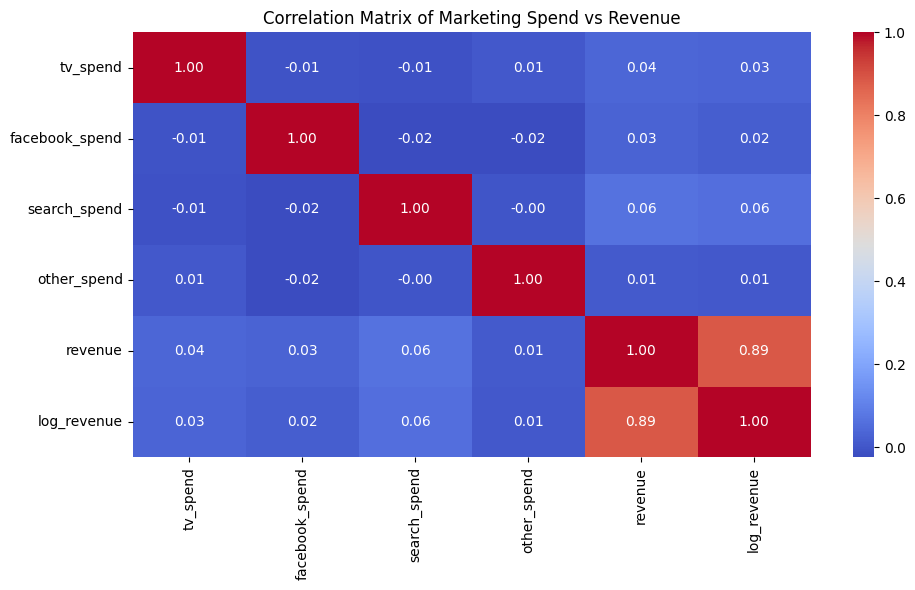

In [56]:
# Cell 2: Data Exploration (Fixed)

# Shape and head
print("Dataset shape:", df.shape)
display(df.head())

# Check for nulls
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
display(df.describe())

# Drop non-numeric columns for correlation
numeric_df = df.drop(columns=["week"])

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Marketing Spend vs Revenue")
plt.tight_layout()

# Save correlation matrix to CSV
plt.savefig(r"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\outputs\figures\correlation_matrix.png") 
plt.show()

In [57]:
# Cell 3: Linear Regression Modeling

# Drop week column
X = df.drop(columns=["week", "revenue"])
y = df["revenue"]

# Add constant term to predictor matrix
X_const = sm.add_constant(X)

# Linear regression on raw revenue
model_raw = sm.OLS(df["revenue"], sm.add_constant(X)).fit()

# Linear regression on log revenue
model_log = sm.OLS(df["log_revenue"], sm.add_constant(X)).fit()

# Display summaries
print("📈 Linear Regression - Raw Revenue")
print(model_raw.summary())
print("\n📈 Linear Regression - Log Revenue")
print(model_log.summary())

📈 Linear Regression - Raw Revenue
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     7382.
Date:                Fri, 01 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:50:52   Log-Likelihood:                -59486.
No. Observations:               10000   AIC:                         1.190e+05
Df Residuals:                    9994   BIC:                         1.190e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const     

In [58]:
# Cell 4: Multicollinearity Check (VIF)

# Reuse X from previous cell (exclude 'week' and 'revenue')
# Add constant again for VIF calculation
X_const_vif = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_const_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_const_vif.values, i)
                   for i in range(X_const_vif.shape[1])]

# Display results
# Save VIF table
vif_data.to_csv(r"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\outputs\reports\vif_report.csv", index=False)
print("Variance Inflation Factors (VIF):")
display(vif_data)

Variance Inflation Factors (VIF):


,feature,VIF
0,const,27.682588
1,tv_spend,1.001294
2,facebook_spend,1.001473
3,search_spend,1.004141
4,other_spend,1.000572
5,log_revenue,1.004957


In [63]:
# Cell 5: ROI Analysis and Budget Reallocation (UPDATED)

y = df["log_revenue"]
X = df[["tv_spend", "facebook_spend", "search_spend", "other_spend"]]
X_const = sm.add_constant(X)
model_log = sm.OLS(y, X_const).fit()

# Trích xuất hệ số, bỏ const
coef_df = pd.DataFrame({
    "channel": X.columns,
    "coefficient": model_log.params[X.columns]
})

# Tính chi tiêu trung bình
avg_spend = X.mean().reset_index()
avg_spend.columns = ["channel", "avg_weekly_spend"]

# Tính ROI: hiệu quả tăng log_revenue trên mỗi đơn vị chi tiêu
roi_df = coef_df.merge(avg_spend, on="channel")
roi_df["roi"] = roi_df["coefficient"] / roi_df["avg_weekly_spend"]

total_spend = roi_df["avg_weekly_spend"].sum()
roi_df["proposed_share"] = roi_df["roi"] / roi_df["roi"].sum()
roi_df["proposed_budget"] = roi_df["proposed_share"] * total_spend

# Step 5: Display results
print("📊 ROI and Budget Reallocation Suggestion:")
display(roi_df[["channel", "coefficient", "avg_weekly_spend", "roi", "proposed_budget"]])

# Step 6: Save to file
roi_df.to_csv(r"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\outputs\reports\roi_and_allocation.csv", index=False)

📊 ROI and Budget Reallocation Suggestion:


,channel,coefficient,avg_weekly_spend,roi,proposed_budget
0,tv_spend,0.072501,2.976625,0.024357,1.224190
1,facebook_spend,0.069213,1.761275,0.039297,1.975114
2,search_spend,0.158073,2.400139,0.065860,3.310188
3,other_spend,0.040564,1.147760,0.035342,1.776307


C:\Users\phuoc\AppData\Local\Temp\ipykernel_20712\3016565890.py:22: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\phuoc\AppData\Local\Temp\ipykernel_20712\3016565890.py:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig(r"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\outputs\figures\budget_allocation_comparison.png")
C:\PythonPackages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


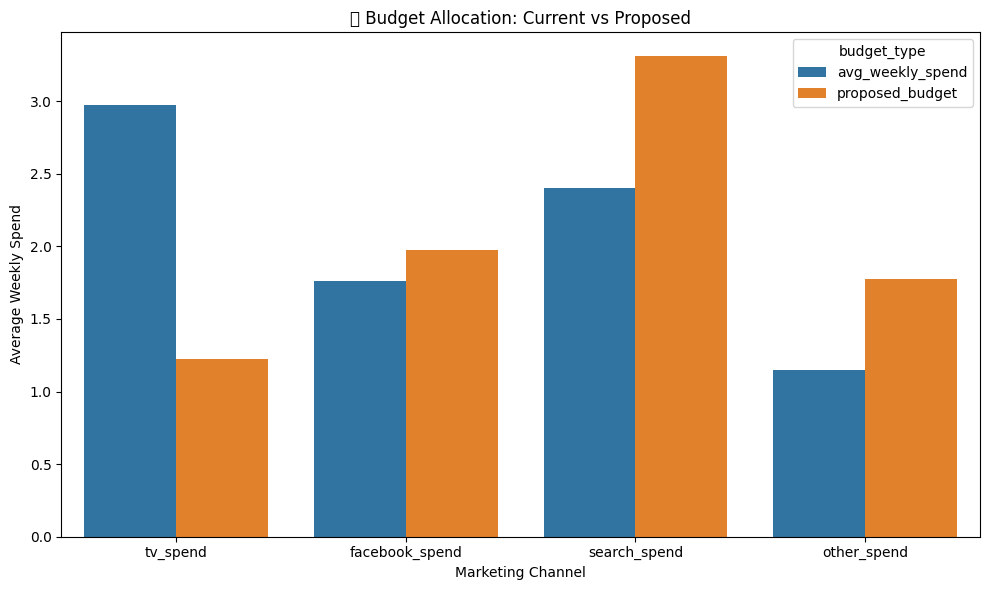

In [64]:
# Cell 6: Budget Allocation Comparison Chart

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare data for plotting
budget_df = roi_df[["channel", "avg_weekly_spend", "proposed_budget"]].copy()
budget_df = pd.melt(
    budget_df,
    id_vars="channel",
    value_vars=["avg_weekly_spend", "proposed_budget"],
    var_name="budget_type",
    value_name="spend"
)

# Step 2: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=budget_df, x="channel", y="spend", hue="budget_type")
plt.title("💰 Budget Allocation: Current vs Proposed")
plt.ylabel("Average Weekly Spend")
plt.xlabel("Marketing Channel")
plt.tight_layout()

# Step 3: Save figure
plt.savefig(r"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\outputs\figures\budget_allocation_comparison.png")
plt.show()

In [66]:
# Cell 7: Summary Insights (UPDATED from new ROI)

# Step 1: Load ROI table
roi_df = pd.read_csv(r"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\outputs\reports\roi_and_allocation.csv")

# Step 2: Get top and bottom channel
roi_df = roi_df.sort_values("roi", ascending=False)
top_channel = roi_df.iloc[0]
bottom_channel = roi_df.iloc[-1]

# Step 3: Format text insight
summary_lines = []
summary_lines.append("📊 MARKETING MIX MODELING INSIGHTS")
summary_lines.append("=" * 40)

summary_lines.append(f"\n📈 Top Performing Channel:\n- {top_channel['channel']} has the highest ROI ({top_channel['roi']:.4f}).")
summary_lines.append(f"\n🔻 Underperforming Channel:\n- {bottom_channel['channel']} has the lowest ROI ({bottom_channel['roi']:.4f}).")

summary_lines.append("\n📊 Proposed Budget Allocation:")
for _, row in roi_df.iterrows():
    summary_lines.append(f"- {row['channel']}: Proposed Budget = ${row['proposed_budget']:.2f} (ROI: {row['roi']:.4f})")

summary_lines.append("\n💡 Strategic Recommendations:")
summary_lines.append("- Increase budget for high-ROI channels (e.g., "
                     f"{top_channel['channel']}) to maximize returns.")
summary_lines.append(f"- Consider reducing spend on low-ROI channel (e.g., "
                     f"{bottom_channel['channel']}).")
summary_lines.append("- Reevaluate ROI quarterly to adapt to market dynamics.")

# Step 4: Save to file (UTF-8 to avoid UnicodeEncodeError)
with open(r"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\outputs\reports\summary_insights.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(summary_lines))

# Optional: Display preview
for line in summary_lines:
    print(line)

📊 MARKETING MIX MODELING INSIGHTS

📈 Top Performing Channel:
- search_spend has the highest ROI (0.0659).

🔻 Underperforming Channel:
- tv_spend has the lowest ROI (0.0244).

📊 Proposed Budget Allocation:
- search_spend: Proposed Budget = $3.31 (ROI: 0.0659)
- facebook_spend: Proposed Budget = $1.98 (ROI: 0.0393)
- other_spend: Proposed Budget = $1.78 (ROI: 0.0353)
- tv_spend: Proposed Budget = $1.22 (ROI: 0.0244)

💡 Strategic Recommendations:
- Increase budget for high-ROI channels (e.g., search_spend) to maximize returns.
- Consider reducing spend on low-ROI channel (e.g., tv_spend).
- Reevaluate ROI quarterly to adapt to market dynamics.


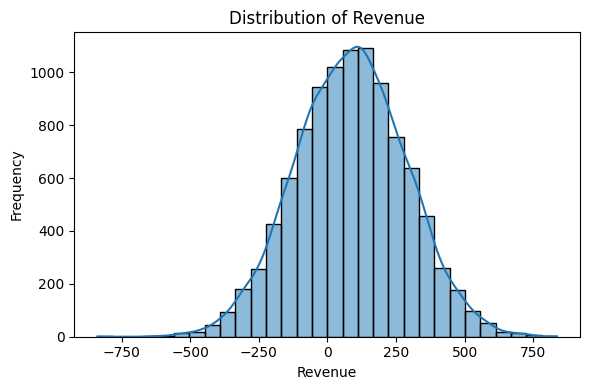

📈 Correlation between tv_spend and revenue: 0.0376


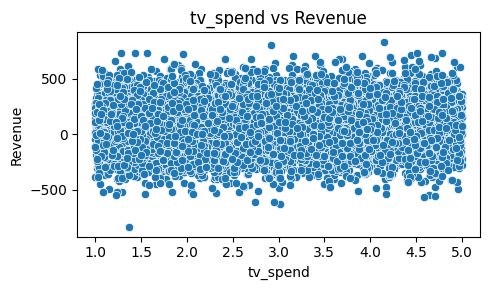

📈 Correlation between facebook_spend and revenue: 0.0293


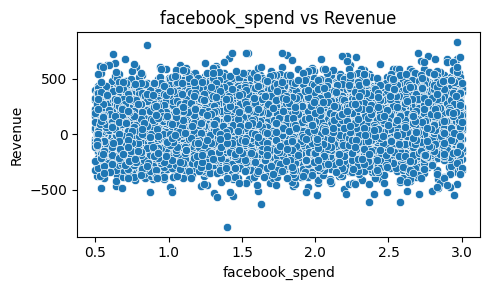

📈 Correlation between search_spend and revenue: 0.0641


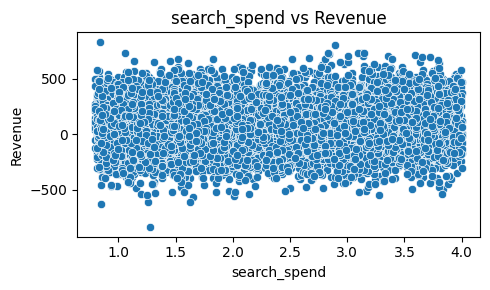

📈 Correlation between other_spend and revenue: 0.0104


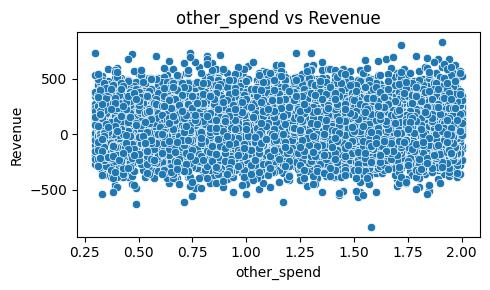


📊 Spend Statistics Summary:


,tv_spend,facebook_spend,search_spend,other_spend
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.976625,1.761275,2.400139,1.147760
std,1.150503,0.723294,0.917703,0.491327
min,1.000000,0.500000,0.800000,0.300000
25%,1.990000,1.130000,1.610000,0.720000
50%,2.970000,1.760000,2.410000,1.150000
75%,3.960000,2.390000,3.180000,1.570000
max,5.000000,3.000000,4.000000,2.000000


In [62]:
# Cell 8: Exploratory Analysis of Mock Data Quality

# 1. Kiểm tra phân phối doanh thu
plt.figure(figsize=(6, 4))
sns.histplot(df["revenue"], bins=30, kde=True)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(r"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\outputs\figures\revenue_distribution.png")
plt.show()

# 2. Kiểm tra tương quan từng kênh với doanh thu
spend_cols = ["tv_spend", "facebook_spend", "search_spend", "other_spend"]

for col in spend_cols:
    corr = df[col].corr(df["revenue"])
    print(f"📈 Correlation between {col} and revenue: {corr:.4f}")

    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=df[col], y=df["revenue"])
    plt.title(f"{col} vs Revenue")
    plt.xlabel(col)
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.savefig(fr"C:\Users\phuoc\Marketing_Mix_Modeling_MMM\outputs\figures\{col}_vs_revenue.png")
    plt.show()

# 3. Check for outliers or zero-variance channels
print("\n📊 Spend Statistics Summary:")
display(df[spend_cols].describe())